# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
import datasist as ds
%matplotlib inline


ModuleNotFoundError: No module named 'seaborn'

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE

# Read Data

In [3]:
df=pd.read_csv(r"C:\Users\aoa0139\OneDrive - UNT System\Ade PhD\RA\Driver Attrition\driverdatav1.csv")

In [4]:
ds.structdata.describe(df)

First five data points


,OperClass,Gender,MilitaryService,Workhrdy,AGE,TrfTime,Status
0,E,M,N,3.4,62,0,1
1,E,M,N,5.5,55,0,1
2,E,M,N,2.6,66,0,1
3,E,M,N,6.9,50,0,1
4,E,M,N,6.0,55,0,1




Random five data points


,OperClass,Gender,MilitaryService,Workhrdy,AGE,TrfTime,Status
113,R,M,N,7.0,54,0,1
137,E,F,N,5.8,54,0,0
25,E,M,N,6.5,25,0,0
171,E,F,N,7.4,46,0,0
3,E,M,N,6.9,50,0,1




Last five data points


,OperClass,Gender,MilitaryService,Workhrdy,AGE,TrfTime,Status
310,E,M,N,4.2,39,0,1
311,E,M,N,4.1,46,0,1
312,E,F,N,5.6,56,0,1
313,E,F,N,3.7,53,0,1
314,R,M,N,8.3,58,0,1




Shape of  data set: (315, 7)


Size of  data set: 2205


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
OperClass,object
Gender,object
MilitaryService,object
Workhrdy,float64
AGE,int64
TrfTime,int64
Status,int64




Numerical Features in Data set
['Workhrdy', 'AGE', 'TrfTime', 'Status']


Categorical Features in Data set


['OperClass', 'Gender', 'MilitaryService']



Statistical Description of Columns


,Workhrdy,AGE,TrfTime,Status
count,315.000000,315.000000,315.000000,315.000000
mean,5.603492,45.028571,6.136508,0.660317
std,1.519393,11.331814,18.984668,0.474355
min,1.000000,23.000000,0.000000,0.000000
25%,4.800000,36.000000,0.000000,0.000000
50%,5.800000,45.000000,0.000000,1.000000
75%,6.500000,53.000000,0.000000,1.000000
max,9.600000,79.000000,154.000000,1.000000




Description of Categorical Features


,count,unique,top,freq
OperClass,315,2,E,223
Gender,315,2,M,174
MilitaryService,315,2,N,303




Unique class Count of Categorical features


,Feature,Unique Count
0,OperClass,2
1,Gender,2
2,MilitaryService,2




Missing Values in Data


,features,missing_counts,missing_percent
0,OperClass,0,0.0
1,Gender,0,0.0
2,MilitaryService,0,0.0
3,Workhrdy,0,0.0
4,AGE,0,0.0
5,TrfTime,0,0.0
6,Status,0,0.0


In [6]:
df.head()

,Workhrdy,AGE,TrfTime,Status,OperClass_R,Gender_M,MilitaryService_Y
0,3.4,62,0,1,0,1,0
1,5.5,55,0,1,0,1,0
2,2.6,66,0,1,0,1,0
3,6.9,50,0,1,0,1,0
4,6.0,55,0,1,0,1,0


# Identify Explained and Outcome Variable

In [7]:
X=df[['OperClass_R','Gender_M', 'MilitaryService_Y','Workhrdy', 'AGE', 'TrfTime']]
y=df['Status']

# Split data into train and test dataset

In [8]:
from sklearn.model_selection import train_test_split
import pickle5 as pickle
import os

In [9]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size= 0.25,random_state=259)

## Transformation Data PipeLine


In [10]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_columns = ['Workhrdy', 'AGE', 'TrfTime', 'Status']

category_columns = ['OperClass', 'Gender', 'MilitaryService']
num_pipeline = Pipeline(steps=["Scaler",StandardScaler()])
cat_pipeline = Pipeline(steps=["one_hot_encoder",OneHotEncoder()])
processor = ColumnTransformer([("num_pipeline",num_pipeline,numerical_columns),
                               "cat_pipeline",cat_pipeline,category_columns])

#Fit_transform the training set

transformed_X_train = processor.fit_transform(X_train)
transformed_X_test = processor.transform(X_test)
#Save the tranformation data file
with open(os.path.join('pickle_files','preprocessor.pkl'),'wb') as f:
    pickle.dump(processor,f)

In [13]:
transformed_X_train

,OperClass_R,Gender_M,MilitaryService_Y,Workhrdy,AGE,TrfTime
60,0,0,0,-1.348965,-0.013348,-0.326658
3,0,1,0,0.858682,0.424180,-0.326658
231,0,1,0,-0.634726,0.074157,-0.326658
19,0,0,0,-2.387858,1.124225,-0.326658
159,1,0,0,0.079513,-0.800899,1.295179
...,...,...,...,...,...,...
244,1,0,0,-0.310072,0.336674,-0.326658
27,0,1,0,0.274305,-0.800899,4.646975
83,0,0,0,0.079513,1.124225,-0.326658
313,0,0,0,-1.219103,0.686697,-0.326658


In [15]:
transformed_X_test

,OperClass_R,Gender_M,MilitaryService_Y,Workhrdy,AGE,TrfTime
204,0,0,0,-0.569795,0.074157,-0.326658
95,0,1,0,0.209374,-1.150922,2.214219
267,1,1,0,0.728821,-1.413439,-0.326658
120,0,1,1,-1.219103,1.824270,-0.326658
311,0,1,0,-0.959380,0.074157,-0.326658
...,...,...,...,...,...,...
303,1,1,0,1.832645,2.436810,-0.326658
222,0,1,0,-0.634726,-0.888405,3.673873
124,0,1,0,-1.478827,-1.150922,-0.326658
264,0,1,0,-0.050349,-1.938473,-0.326658


# Correlation

In [16]:
df.corr()

,Workhrdy,AGE,TrfTime,Status,OperClass_R,Gender_M,MilitaryService_Y
Workhrdy,1.000000,0.064826,0.074133,-0.060211,0.056050,0.134222,0.056389
AGE,0.064826,1.000000,-0.027138,0.120306,0.085387,-0.023120,0.090378
TrfTime,0.074133,-0.027138,1.000000,0.232204,-0.063559,0.026356,0.095684
Status,-0.060211,0.120306,0.232204,1.000000,0.165853,0.095775,-0.067365
OperClass_R,0.056050,0.085387,-0.063559,0.165853,1.000000,0.058702,0.018062
Gender_M,0.134222,-0.023120,0.026356,0.095775,0.058702,1.000000,0.112442
MilitaryService_Y,0.056389,0.090378,0.095684,-0.067365,0.018062,0.112442,1.000000


In [17]:
import seaborn as sns

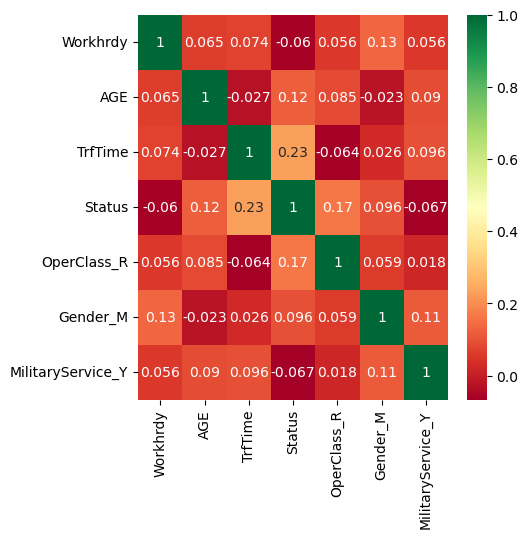

In [18]:
corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Fit Model & Prediction

In [22]:
#FineTune Hyperparameter
training_acc=[]
test_acc=[]

neighbors= range(1,30)

for num_neighbors in neighbors:
    Knn_model=KNeighborsClassifier(n_neighbors=num_neighbors)
    Knn_model.fit(transformed_X_train,y_train)
    training_acc.append(Knn_model.score(transformed_X_train,y_train))
    test_acc.append(Knn_model.score(transformed_X_test,y_test))
    
    
    

C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 0, 'Number of neighbors')

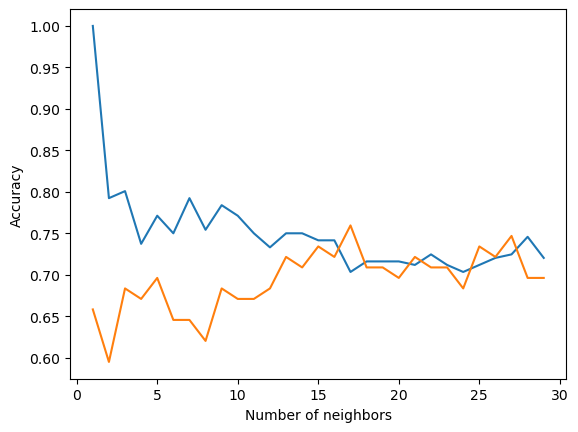

In [23]:
import matplotlib.pyplot as plt
plt.plot(neighbors,training_acc,label = "training accuracy")
plt.plot(neighbors,test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")

In [19]:
# based on the graph above, choose n_neighbors = 17
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(transformed_X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [21]:
pred=knn.predict(transformed_X_test)

C:\Users\aoa0139\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model Evaluation

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [25]:
print(confusion_matrix(y_test,pred))

[[12 14]
 [ 5 48]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56        26
           1       0.77      0.91      0.83        53

    accuracy                           0.76        79
   macro avg       0.74      0.68      0.70        79
weighted avg       0.75      0.76      0.74        79



# Pickle file for deployment

In [30]:
#Pickling the model file
import pickle
model_path  = os.path.join("pickle_files","knn.pkl")
with open(model_path,'wb') as f:
    pickle.dump(f)
